# Statystyka

### Opis pojedynczego zbioru danych

In [1]:
# Przykładowe dane
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

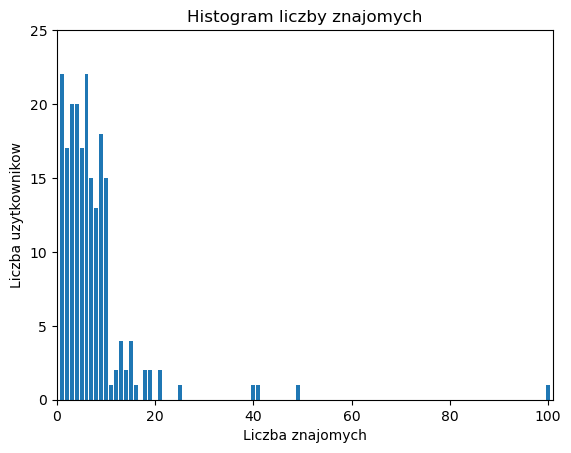

In [2]:
# Liczba znajomych przedstawiona na histogramie
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)                         # Najwyższa wartość to 100.
ys = [friend_counts[x] for x in xs]     # Wysokość słupków odzwierciedla liczbę znajomych.
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram liczby znajomych")
plt.xlabel("Liczba znajomych")
plt.ylabel("Liczba uzytkownikow")
plt.show()

In [3]:
# Liczba elementów zbioru danych
num_points = len(num_friends)               # 204
num_points 

204

In [4]:
# Wartość najniższa
smallest_value = min(num_friends)           # 1
smallest_value 

1

In [5]:
# Wartość najwyższa
largest_value = max(num_friends)            # 100
largest_value 

100.0

In [6]:
# Posortowanie danych
sorted_values = sorted(num_friends)

In [7]:
smallest_value = sorted_values[0]           # 1
smallest_value

1

In [8]:
second_smallest_value = sorted_values[1]    # 1
second_smallest_value 

1

In [9]:
second_largest_value = sorted_values[-2]    # 49
second_largest_value 

49

### Tendencje centralne

In [10]:
# Średnia
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)   # 7.333333

7.333333333333333

In [11]:
assert 7.3333 < mean(num_friends) < 7.3334

In [12]:
# Mediana

# podkreślenie w nazwie oznacza, że jest to funkcja "prywatna";
# zakładamy, że będzie ona wywoływana tylko przez funkcję median,
# a nie bezpośrednio przez użytkowników
def _median_odd(xs: List[float]) -> float:
    """Jeżeli len(xs) jest nieparzyste, to mediana jest środkowym elementem."""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """Jeżeli len(xs) jest parzyste, to mediana jest średnią dwóch środkowych elementów."""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # np. dla długości = 4 hi_midpoint = 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Zwraca medianę wektora v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [13]:
median([1, 10, 2, 9, 5])

5

In [14]:
median([1, 9, 2, 10])

5.5

In [15]:
# Mediana liczby znajomych
median(num_friends)

6.0

In [16]:
# Kwantyl - reprezentuje wartości mniejsze od tej, do której należy określony percentyl dancyh (mediana reprezentuje wartość 
# mniejszą od 50% danych)
def quantile(xs: List[float], p: float) -> float:
    """Zwraca ze zbioru x wartość będącą p-tym percentylem."""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [17]:
quantile(num_friends, 0.10)

1

In [18]:
quantile(num_friends, 0.25)

3

In [19]:
quantile(num_friends, 0.75)

9

In [20]:
quantile(num_friends, 0.90)

13

In [21]:
# Dominanta
def mode(x: List[float]) -> List[float]:
    """Zwraca listę. Zbiór może zawierać więcej niż jedną dominantę."""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [22]:
set(mode(num_friends))

{1, 6}

### Dyspersja

Dyspersja określa rozrzut danych (ich zróżnicowanie). Zazwyczaj w parametrach statystycznych wartości zbliżone do zera oznaczają "praktyczny brak rozrzutu", a duże wartości oznaczają "duży rozrzut". 

In [23]:
# Zakres - różnica pomiędzy najwyższa i najmniejszą wartością
# W Pythonie występuje już słowo kluczowe range, a więc skorzystamy z innej nazwy.
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

In [24]:
data_range(num_friends)

99.0

Wariancja określa odchylenie pojedynczej zmiennej od średniej

In [25]:
from typing import List

Vector = List[float]

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [26]:
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [27]:
# Wariancja

def de_mean(xs: List[float]) -> List[float]:
    """Przekształca x poprzez odjęcie średniej."""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Prawie jak średnie odchylenie kwadratowe od średniej."""
    assert len(xs) >= 2, "wariancja wymaga co najmniej dwóch elementów"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1) 

In [28]:
variance(num_friends)

81.54351395730716

In [29]:
# Odchylenie standardowe
import math

def standard_deviation(xs: List[float]) -> float:
    """Odchylenie standardowe jest pierwiastkiem kwadratowym wariancji."""
    return math.sqrt(variance(xs))

In [30]:
standard_deviation(num_friends)

9.03014473623248

In [31]:
assert 9.02 < standard_deviation(num_friends) < 9.04

In [32]:
# Różnica pomiędzy 75. i 25. percentylem
def interquartile_range(xs: List[float]) -> float:
    """Zwraca różnicę między 25 a 75 percentylem"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [33]:
interquartile_range(num_friends)

6

### Korelacja

In [34]:
# Kowariancja mmierzy jak dwie zmienne różnią się łacznie od swoich średnich
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

In [35]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs i ys muszą mieć taką samą liczbę elementów"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [36]:
covariance(num_friends, daily_minutes)

22.425435139573064

In [37]:
covariance(num_friends, daily_hours)

0.37375725232621776

In [38]:
assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

In [39]:
# Korelacja
def correlation(xs: List[float], ys: List[float]) -> float:
    """Mierzy, jak bardzo xs i ys różnią się łącznie od swoich średnich"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # Przy braku wariancji korelacja jest zerowa.

In [40]:
correlation(num_friends, daily_minutes)

0.24736957366478218

In [41]:
correlation(num_friends, daily_hours) 

0.24736957366478196

In [42]:
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

In [43]:
# Zignorowanie osoby która ma 100 znajomych, która dziennie spędza w serwisie tylko minutę
outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]


In [44]:
correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

In [45]:
correlation(num_friends_good, daily_hours_good)

0.5736792115665579

In [46]:
assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58